<a href="https://colab.research.google.com/github/NoahGV/AA_PRACTICA4_GRUPO_B5/blob/main/PRACTICA4_Oficial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRÁCTICA 4: ALGORÍTMO GENÉTICO**

# GRUPO 5: Jonás García Vallejo, Lydia Sánchez-Cano Sánchez y Noah García Villanueva

# ENUNCIADO

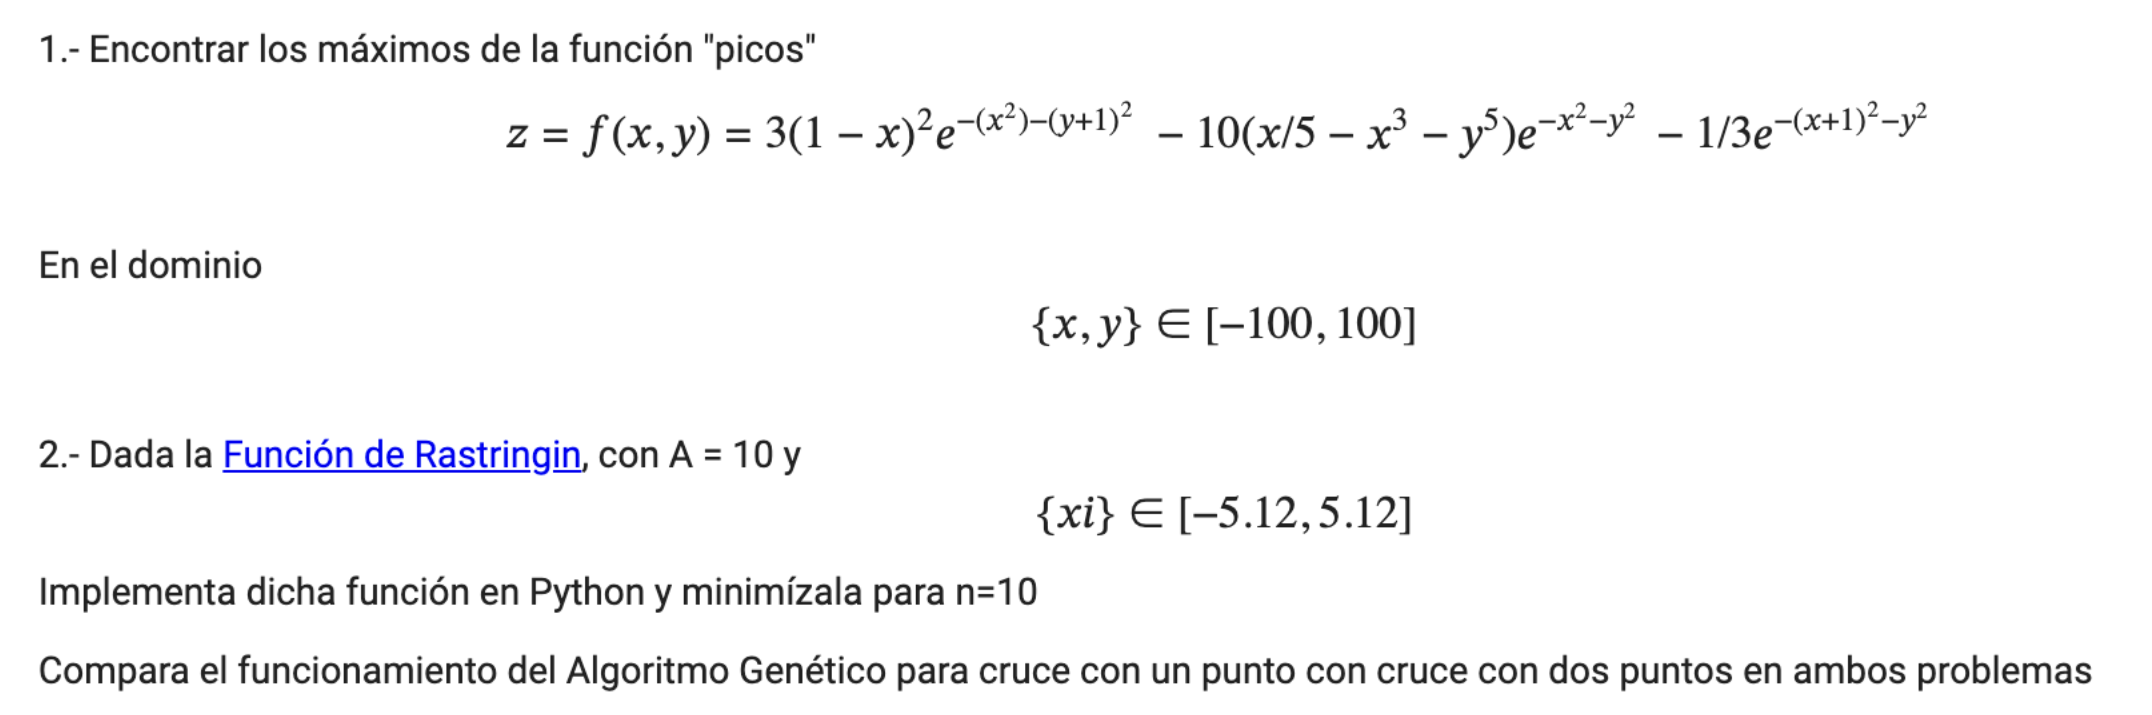

# **EJERCICIO 1**

Instalamos las librerías necesarias para nuestro ejercicio

In [ ]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 815.5 kB/s eta 0:00:00


In [ ]:
!pip install matplotlib

In [ ]:
!pip install numpy

In [ ]:
!pip install scipy

In [ ]:
!pip install scoop

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scoop: filename=scoop-0.7.2.0-py3-none-any.whl size=78113 sha256=92715bb9ded8417092810b4c7f6a54a0376ce63e5fa0ed2be30fb2a59df9fc5e
  Stored in directory: /root/.cache/pip/wheels/26/c6/da/088e4bffcfbc33fa40644ca636267bc801c8fd9eef973483db
Successfully built scoop


Importamos las librerías necesarias.

In [ ]:
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt

In [ ]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Fijamos la semilla. Si no cambiamos la semilla, la función generará los mismos número aleatorios.

Además, generamos los números pseudo-aleatorios en 2 list comprenhension para encapsular todos los datos en las listas x e y

In [ ]:
# Importamos la librería
import random
random.seed(0)
x = [random.uniform(-100, 100) for i in range(10)]
y = [random.uniform(-100, 100) for i in range(10)]
print('x= ', x)
print('y= ', y)

x=  [68.88437030500961, 51.590880588060486, -15.885683833830996, -48.21664994140733, 2.254944273721705, -19.01317250991714, 56.75971780695451, -39.33745478421451, -4.680609169528836, 16.676407891006235]
y=  [81.62257703906704, 0.9373711634780477, -43.63243112005924, 51.16084083144477, 23.67379933506632, -49.898731727511894, 81.94925119364802, 96.55709520753061, 62.04344719931791, 80.43319008791653]


A continuación, definimos la función objetivo de nuestro problema.

In [ ]:
# Definimos la función objetivo
def funcion_prueba(x):
    res1 = 3*((1-x[0])**2)*np.exp(-(x[0]**2)-((x[1]+1)**2))
    res2=-10*((x[0]/5)-(x[0]**3)-(x[1]**5))*np.exp(-(x[0]**2)-(x[1]**2))
    res3=-(1/3)*np.exp(-((x[0]+1)**2)-(x[1]**2))
    res=res1+res2+res3
    return res

Generamos vectores que barran todo el dominio

Hemos escogido un dominio más pequeño como es [-5,5] para poder visualilzar mejor el gráfico que nos queda, ya que podremos ver mejor los máximos y mínimos de la función.

In [ ]:
x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)
print('x= ', x)
print('y= ', y)

x=  [-5.         -4.98998999 -4.97997998 -4.96996997 -4.95995996 -4.94994995
 -4.93993994 -4.92992993 -4.91991992 -4.90990991 -4.8998999  -4.88988989
 -4.87987988 -4.86986987 -4.85985986 -4.84984985 -4.83983984 -4.82982983
 -4.81981982 -4.80980981 -4.7997998  -4.78978979 -4.77977978 -4.76976977
 -4.75975976 -4.74974975 -4.73973974 -4.72972973 -4.71971972 -4.70970971
 -4.6996997  -4.68968969 -4.67967968 -4.66966967 -4.65965966 -4.64964965
 -4.63963964 -4.62962963 -4.61961962 -4.60960961 -4.5995996  -4.58958959
 -4.57957958 -4.56956957 -4.55955956 -4.54954955 -4.53953954 -4.52952953
 -4.51951952 -4.50950951 -4.4994995  -4.48948949 -4.47947948 -4.46946947
 -4.45945946 -4.44944945 -4.43943944 -4.42942943 -4.41941942 -4.40940941
 -4.3993994  -4.38938939 -4.37937938 -4.36936937 -4.35935936 -4.34934935
 -4.33933934 -4.32932933 -4.31931932 -4.30930931 -4.2992993  -4.28928929
 -4.27927928 -4.26926927 -4.25925926 -4.24924925 -4.23923924 -4.22922923
 -4.21921922 -4.20920921 -4.1991992  -4.1891891

Evaluamos todos los valores de las variables

In [ ]:
x_ax, y_ax = np.meshgrid(x, y)
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
fx = np.reshape([funcion_prueba(val) for val in vals],(1000, 1000))

Representamos los resultados obtenidos

Text(0.5, 0, 'f(x,y)')

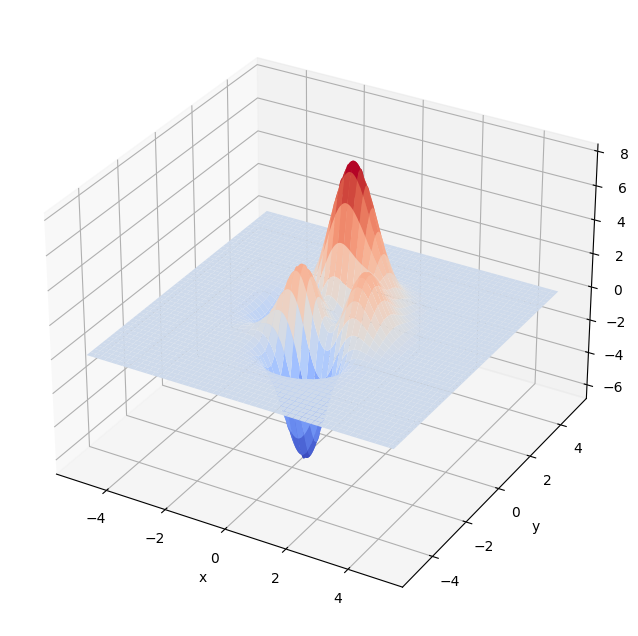

In [ ]:
figure_3d = plt.figure(figsize=(12,8))
ax = figure_3d.add_subplot(111, projection="3d")
ax.plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")

En la gráfica se puede observar que el conjunto de soluciones más óptimas está encerrado en el rango [-5, 5]. De igual manera, se puede apreciar que hay 3 máximos, dos de los cuales son locales y uno global. Asimismo se observa un mínimo global y se intuye un mínimo local tapado por los máximos.

# **1. Definición del problema y generación de la población inicial**

Se importan las librerías necesarias.

In [ ]:
import random
from deap import base
from deap import creator
from deap import tools

## 1.1 Creación del problema

In [ ]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

- **creator.create**: Esta es una función  para crear nuevos tipos de objetos. En este caso, se está utilizando para crear un nuevo tipo llamado "FitnessMax".


- **base.Fitness**: Este es el tipo de objeto base que se utilizará como plantilla para crear el nuevo tipo. En este caso, se está utilizando base.Fitness para representar la aptitud (fitness) de un individuo en un algoritmo evolutivo.

- **weights**=(1.0,): Esta parte especifica los pesos asociados a los objetivos de la función de aptitud. En este caso, hay un solo objetivo con un peso de 1.0. El valor 1.0 indica que este es un problema de maximización.
Se busca maximizar la función de aptitud.

Si fuera un problema de minimización, los pesos podrían ser negativos o se usaría el tipo FitnessMin en lugar de FitnessMax.

## 1.2 Creación de la plantilla del individuo

In [ ]:
creator.create("Individual", list, fitness=creator.FitnessMax)

El código crea un nuevo tipo de objeto llamado "Individual", que se representará como una lista y estará asociado con la función de aptitud de tipo "FitnessMax". Este tipo de objeto es comúnmente utilizado en algoritmos evolutivos para representar a los individuos en una población.

## 1.3 Crear individuos aleatorios y población inicial

In [ ]:
toolbox = base.Toolbox()

Generación de genes

In [ ]:
toolbox.register("attr_uniform", random.uniform, -5, 5)

- **toolbox**  es una forma de organizar las herramientas utilizadas en algoritmos evolutivos.

- **register**  se utiliza para registrar una nueva función en el toolbox.

- **"attr_uniform"** es el nombre dado a la función registrada. Usaremos este nombre más adelante para referirnos a la función al crear individuos en nuestro algoritmo evolutivo.

- **random.uniform** es la función que se está registrando. Es la función random.uniform del módulo random de Python, que genera números aleatorios distribuidos uniformemente entre dos valores dados.

Probamos y vemos que generamos un número aleatorio entre -5 y 5 distinto cada vez

In [ ]:
toolbox.attr_uniform()

-1.8985243068066735

Generación de inviduos

In [ ]:
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)

Ejemplo de la generación de un individuo aleatorio:

In [ ]:
individuo = toolbox.individual()
individuo

[2.298317482601286, 3.9883828796799357]

 Recordamos que individuo es una lista que tiene un atributo fitness
 dónde se almacena la calidad del mismo, que al principio será
vacío, pues aún no ha sido evaluado.

In [ ]:
individuo.fitness.values

()

El procedimiento para **crear una población** es análogo a la creación de un individuo:

Generación de población

In [ ]:
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 128)

Ejemplo de creación de una población. Se ve que es
una lista de 32 listas (una por cada individuo)

In [ ]:
poblacion = toolbox.population()
print(poblacion)

[[1.8398393191544127, -0.2785728454728664], [-3.992987919316342, -0.6582816454621634], [1.1088697344380165, 4.130110532378982], [4.666063677707587, -0.22990223447282965], [3.6530992777164, -2.395076896080406], [3.0502782701302227, 0.4869930383558927], [-4.8595829983598104, 2.1970468640395415], [-1.0117645777573125, 3.2484497714823295], [1.6815320123185087, -4.988571806855717], [-0.06422133534675378, 3.6760277549278086], [-2.5608912311286804, -1.7479563725260991], [3.7047123210865465, -3.089329084976095], [0.6751074062067186, -2.6138407138477984], [4.675402502901434, 3.0317946927987], [-0.5203042856442961, -4.195541814474646], [-1.7994539532745426, 0.0794064252057396], [4.3283382422690675, -3.909421540688963], [0.5126724609055122, 2.0656140986688962], [0.4744091132842376, 3.14466863291336], [0.4028360697032394, 4.638385459738009], [1.0318562796138302, 0.8761706417543635], [-0.5501097372448385, 0.9628686158310629], [-1.1509885402733957, 0.7565101416488851], [-2.09670497597242, -3.1060867

Cada individuo tiene 2 componentes

In [ ]:
poblacion[0]

[1.8398393191544127, -0.2785728454728664]

In [ ]:
poblacion[0].fitness.values

()

# **2. Función objetivo y operadores genéticos**

Ahora crearemos nuestra **función objetivo** y la **registraremos** en nuestro `Toolbox`

## 2.1 Función Objetivo

Describimos nuestra función objetivo

In [ ]:
def funcion_objetivo(x):
    # x es x[0] e y es x[1]
    for i in range(len(x)):
        if x[i] > 100 or x[i] < -100:
            return (-1,)  # Devolver una tupla con un solo valor
    res = 3*(1-x[0])*2*math.exp(-(x[0]**2)-(x[1]+1)**2)-10*(x[0]/5-x[0]**3-x[1]**5)*math.exp(-x[0]**2-x[1]**2)-(1/3)*math.exp(-(x[0]+1)**2-x[1]**2)
    return res,

In [ ]:
toolbox.register("evaluate", funcion_objetivo)

Ejemplo de uso 1

In [ ]:
funcion_objetivo(individuo)

(6.404949077238867e-06,)

Ejemplo de uso 2

In [ ]:
toolbox.evaluate(individuo)

(6.404949077238867e-06,)

# **3. Incorporamos los operadores genéticos**

##CRUCE

Registro de operación genética de cruce

In [ ]:
toolbox.register("mate", tools.cxOnePoint)

##MUTACIÓN

In [ ]:
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.2)

El código está configurando la operación de mutación en el algoritmo evolutivo, utilizando una mutación gaussiana con un valor medio de 0, una desviación estándar de 5 y una probabilidad de mutación de 0.2 para cada gen individual.

##SELECCIÓN

In [ ]:
toolbox.register("select", tools.selTournament, tournsize=3)

Configura la operación de selección en el algoritmo evolutivo utilizando la selección por torneo con un tamaño de torneo de 3 individuos. Este enfoque de selección ayuda a mantener diversidad en la población y a seleccionar individuos con mejores adaptaciones para la reproducción.

# **4. Últimos pasos: Algoritmo genético como una caja negra**

## 4.1 Configuración del Algoritmo Genético

Definimos la semilla del generador de números aleatorios.


Se hace así para tener resultados reproducibles.

In [ ]:
random.seed(42)

 Definimos:
  - CXPB: Probabilidad de Cruce
  - MUTPB: Probabilidad de Mutación
  - NGEN: Número de Generaciones

  
Los valores son de prueba para obtener unos resultados preeliminares

In [ ]:
CXPB, MUTPB, NGEN = 0.7, 0.3, 100

Generamos la Población Inicial

In [ ]:
pop = toolbox.population()
pop

[[1.3942679845788373, -4.74989244777333],
 [-2.2497068163088074, -2.7678926185117723],
 [2.3647121416401244, 1.7669948742291126],
 [3.921795677048454, -4.130611673705839],
 [-0.7807818031472955, -4.702027805619297],
 [-2.8136202519639664, 0.053552881033623656],
 [-4.734640303161363, -3.011623493133515],
 [1.4988443777952316, 0.4494148060321663],
 [-2.795593779593033, 0.8926568387590876],
 [3.0943045667782663, -4.93501240321939],
 [3.058192518328079, 1.9813939498822686],
 [-1.5974948348200813, -3.4452050018821847],
 [4.572130722067811, -1.6340545488737321],
 [-4.072541566198521, -4.03283623166536],
 [3.4749436634745976, 1.0372603136689111],
 [3.0712827327438017, 2.2973178669381786],
 [0.36228091454700717, 4.731157639793706],
 [-1.214656227916465, 0.5204063127322698],
 [3.294046642529949, 1.1851975236424606],
 [3.6170690031077726, 0.7735214525676204],
 [2.045718362149235, -4.541756163443377],
 [-2.7210172434845314, -2.1061203639789285],
 [-4.202080230763725, -2.672091136389698],
 [-3.989

 Definimos el objeto hof que almacenará el mejor individuo
encontrado a lo largo de las generaciones del Algoritmo G.

In [ ]:
hof = tools.HallOfFame(1)
hof

In [ ]:
print(hof)

[]


 Definimos un objeto para generar las estadísticas de la población a lo largo de las generaciones del algoritmo

In [ ]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
print(stats)

In [ ]:
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

Ejecutamos el algoritmo genético

In [ ]:
# loogbook contendrá todo el registro de evolución
logbook = tools.Logbook()

In [ ]:
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)

gen	nevals	avg     	std     	min     	max   
0  	128   	0.210275	0.969736	-2.57733	5.3764
1  	102   	0.907988	1.83305 	-1.91204	7.57811
2  	99    	1.65977 	2.00474 	-1.79015	7.26217
3  	110   	3.05949 	2.21445 	-0.789105	7.65472
4  	100   	4.48954 	2.29607 	-2.77694 	7.65472
5  	93    	5.75541 	2.11737 	3.05644e-51	7.98705
6  	109   	6.70009 	1.761   	2.58659e-30	7.98705
7  	95    	6.92374 	2.05743 	-0.00885003	8.0799 
8  	100   	7.26908 	1.7147  	-0.0301851 	8.0799 
9  	92    	6.9044  	2.58395 	-0.000461519	8.09189
10 	101   	7.14166 	2.48394 	-4.08174    	8.09189
11 	112   	7.42407 	2.06227 	-0.0117285  	8.09189
12 	103   	6.98313 	2.7116  	-0.000112317	8.09189
13 	107   	7.13893 	2.48335 	1.07485e-27 	8.09189
14 	104   	7.50326 	2.07664 	-2.65643    	8.09189
15 	102   	7.25005 	2.52023 	-2.24043    	8.09189
16 	104   	7.6715  	1.741   	-2.61674e-28	8.09189
17 	101   	7.32547 	2.34545 	-2.38008    	8.09189
18 	114   	7.27752 	2.31703 	-0.00248682 	8.09189
19 	97    	7.27653 	2.37234 

In [ ]:
print(pop)

[[-0.010047628706261805, 1.5825588431196], [-0.010047628706261805, 1.5825588431196], [-0.010047628706261805, 1.5825588431196], [-0.010047628706261805, 1.5825588431196], [-0.010047628706261805, 1.5825588431196], [-0.010047628706261805, 1.5825588431196], [-0.010047628706261805, 1.5825588431196], [-0.010047628706261805, 1.5825588431196], [-0.010047628706261805, 1.5825588431196], [-0.010047628706261805, 1.5825588431196], [-0.010047628706261805, 1.5825588431196], [-0.010047628706261805, 1.5825588431196], [-0.010047628706261805, 1.5825588431196], [-0.010047628706261805, 8.09466218163279], [-0.010047628706261805, 1.5825588431196], [-0.010047628706261805, 1.5825588431196], [-3.204903903075153, 1.5825588431196], [-0.010047628706261805, 1.5825588431196], [-0.010047628706261805, 1.5825588431196], [1.5773097067766135, 1.5825588431196], [-0.010047628706261805, 1.5825588431196], [-0.010047628706261805, 1.5825588431196], [-0.010047628706261805, 1.5825588431196], [-0.010047628706261805, 1.582558843119

In [ ]:
print(logbook)

gen	nevals	avg     	std     	min         	max    
0  	128   	0.210275	0.969736	-2.57733    	5.3764 
1  	102   	0.907988	1.83305 	-1.91204    	7.57811
2  	99    	1.65977 	2.00474 	-1.79015    	7.26217
3  	110   	3.05949 	2.21445 	-0.789105   	7.65472
4  	100   	4.48954 	2.29607 	-2.77694    	7.65472
5  	93    	5.75541 	2.11737 	3.05644e-51 	7.98705
6  	109   	6.70009 	1.761   	2.58659e-30 	7.98705
7  	95    	6.92374 	2.05743 	-0.00885003 	8.0799 
8  	100   	7.26908 	1.7147  	-0.0301851  	8.0799 
9  	92    	6.9044  	2.58395 	-0.000461519	8.09189
10 	101   	7.14166 	2.48394 	-4.08174    	8.09189
11 	112   	7.42407 	2.06227 	-0.0117285  	8.09189
12 	103   	6.98313 	2.7116  	-0.000112317	8.09189
13 	107   	7.13893 	2.48335 	1.07485e-27 	8.09189
14 	104   	7.50326 	2.07664 	-2.65643    	8.09189
15 	102   	7.25005 	2.52023 	-2.24043    	8.09189
16 	104   	7.6715  	1.741   	-2.61674e-28	8.09189
17 	101   	7.32547 	2.34545 	-2.38008    	8.09189
18 	114   	7.27752 	2.31703 	-0.00248682 	8.09189


In [ ]:
def main():
    # Definimos la semilla del generador de números aleatorios
    # Se hace así para tener resultados reproducibles
    random.seed(42)

    # Definimos:
    #  CXPB: Probabilidad de Cruce
    #  MUTPB: Probabilidad de Mutación
    #  NGEN: Número de Generaciones
    # Los valores son de prueba para obtener unos resultados preeliminares
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20

    #Generamos la Población Inicial
    pop = toolbox.population()

    # Definimos el objeto hof que almacenará el mejor individuo
    # encontrado a lo largo de las generaciones del Algoritmo G.
    hof = tools.HallOfFame(1)

    # Definimos un objeto para generar las estadísticas de la
    # población a lo largo de las generaciones del algoritmo
    stats = tools.Statistics(lambda ind: ind.fitness.values)

    # Registramos en el objeto stats
    # las funciones estadísticas a usar
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    # loogbook contendrá todo el registro de evolución
    logbook = tools.Logbook()

    # Algoritmo eaSimple, devuelve la población final y el registro de evolución
    # y tiene como entrada:
    # population – población inicial
    # toolbox – La caja de herramientas con todas las funciones necesarias
    # cxpb – Probabilidad de cruce en tanto por uno
    # mutpb – Probabilidad de mutación en tanto por uno
    # ngen – Nº de generaciones del algoritmo
    # stats – Objeto estadístico con las funciones registradas (opcional)
    # halloffame – Objeto del tipo HallOfFame con los mejores individuos por generación, opcional
    # verbose – Si se deben mostrar o no las estadísticas de cada generación
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)

    # Devolvemos el HallOfFame y el registro de evolución
    return hof, logbook

## 4.2 Resultados del Algoritmo Genético

In [ ]:
best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])

gen	nevals	avg     	std     	min     	max   
0  	128   	0.210275	0.969736	-2.57733	5.3764
1  	73    	0.59392 	1.38768 	-4.54969	5.3764
2  	73    	1.34091 	1.63896 	-1.01247	6.32435
3  	75    	2.43783 	1.93415 	-2.03419	6.32435
4  	82    	3.88857 	1.90057 	-0.568654	7.44907
5  	84    	4.91287 	1.67541 	-3.08687e-05	7.44907
6  	63    	5.66081 	1.65552 	-0.128375   	7.44907
7  	78    	6.26926 	1.43267 	-2.72027e-10	7.44907
8  	80    	6.4395  	1.85214 	-0.00893523 	7.6805 
9  	66    	6.8673  	1.55456 	-0.00109761 	7.6805 
10 	71    	6.86185 	1.93591 	-1.76608    	7.6805 
11 	83    	7.03599 	1.67727 	-2.27187e-30	7.6805 
12 	72    	7.09631 	1.71091 	-0.034541   	7.6805 
13 	90    	6.8872  	2.11582 	-3.03926    	7.6805 
14 	81    	6.81923 	2.48537 	-3.43874    	7.80082
15 	72    	7.2459  	1.83395 	-2.84499    	7.92391
16 	70    	7.01817 	2.16132 	-0.00634235 	7.92391
17 	80    	7.29877 	1.72336 	-0.0907821  	8.04012
18 	76    	7.22117 	1.97951 	-1.60661e-14	8.04012
19 	90    	7.50584 	1.6810

In [ ]:
print(log)

gen	nevals	avg     	std     	min         	max    
0  	128   	0.210275	0.969736	-2.57733    	5.3764 
1  	73    	0.59392 	1.38768 	-4.54969    	5.3764 
2  	73    	1.34091 	1.63896 	-1.01247    	6.32435
3  	75    	2.43783 	1.93415 	-2.03419    	6.32435
4  	82    	3.88857 	1.90057 	-0.568654   	7.44907
5  	84    	4.91287 	1.67541 	-3.08687e-05	7.44907
6  	63    	5.66081 	1.65552 	-0.128375   	7.44907
7  	78    	6.26926 	1.43267 	-2.72027e-10	7.44907
8  	80    	6.4395  	1.85214 	-0.00893523 	7.6805 
9  	66    	6.8673  	1.55456 	-0.00109761 	7.6805 
10 	71    	6.86185 	1.93591 	-1.76608    	7.6805 
11 	83    	7.03599 	1.67727 	-2.27187e-30	7.6805 
12 	72    	7.09631 	1.71091 	-0.034541   	7.6805 
13 	90    	6.8872  	2.11582 	-3.03926    	7.6805 
14 	81    	6.81923 	2.48537 	-3.43874    	7.80082
15 	72    	7.2459  	1.83395 	-2.84499    	7.92391
16 	70    	7.01817 	2.16132 	-0.00634235 	7.92391
17 	80    	7.29877 	1.72336 	-0.0907821  	8.04012
18 	76    	7.22117 	1.97951 	-1.60661e-14	8.04012


Resultados consistentes

In [ ]:
def main():
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

In [ ]:
# Inicializamos la lista de las soluciones. Almacenaremos el fitness
# del mejor individuo de cada intento del algoritmo genético
lista_mejores = list()

# Lancamos el algoritmo 20 veces
for i in range(20):
    # Fijamos la semilla
    random.seed(i)
    best, log = main()
    lista_mejores.append(best[0].fitness.values)

# Mostramos los resultados. Al terminar el bucle, calculamos
# la media y el mejor resultado de todos los intentos
media = np.mean(lista_mejores)
mejor_total = max(lista_mejores)
print("media: %f" %media)
print("mejor: %f" %mejor_total)

gen	nevals	avg     	std    	min     	max    
0  	128   	0.238916	1.12595	-3.92704	6.32221
1  	78    	0.42244 	1.06105	-2.18306	5.2727 
2  	64    	1.02806 	1.52847	-1.74561	7.98464
3  	65    	2.30075 	2.13573	-1.77606	8.08603
4  	80    	3.62404 	2.53203	-1.77606	8.0058 
5  	86    	5.19907 	2.44694	-0.00204615	8.0058 
6  	93    	6.64079 	2.03042	1.73395e-27	8.08955
7  	84    	7.20247 	2.1415 	-1.234     	8.08955
8  	80    	7.50147 	1.92999	-0.0063483 	8.08955
9  	79    	7.6099  	1.76527	-0.131735  	8.08955
10 	73    	7.70684 	1.70942	-0.00641909	8.08955
11 	81    	7.35324 	2.27651	-0.0134279 	8.08955
12 	76    	7.11484 	2.66839	-3.29846   	8.08955
13 	84    	7.60919 	1.86537	-1.62731e-12	8.08955
14 	86    	7.67907 	1.63709	-6.63715e-09	8.08955
15 	60    	7.84679 	1.39568	-2.10335    	8.08955
16 	78    	7.53059 	1.98583	-0.0086696  	8.10373
17 	88    	7.24391 	2.39611	-8.09778e-05	8.10373
18 	85    	7.59669 	1.91506	-0.00187624 	8.10373
19 	77    	7.59283 	1.88349	-0.00185218 	8.10373
20 

# **5. Convergencia del algoritmo**

In [ ]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-1, 4])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

gen	nevals	avg     	std     	min      	max    
0  	8     	0.323548	0.871546	-0.088594	2.62753
1  	2     	0.708011	1.11406 	3.36096e-06	2.62753
2  	7     	0.899147	0.990462	-9.15132e-40	2.62753
3  	4     	1.41576 	0.923576	0.385226    	2.62753
4  	3     	2.1458  	0.696636	0.945419    	2.62753
5  	4     	2.27869 	0.86292 	-1.55186e-11	2.62753
6  	8     	2.58707 	0.107064	2.3038      	2.62753
7  	7     	2.29909 	0.868975	3.7342e-11  	2.62753
8  	7     	2.29909 	0.868969	1.83309e-05 	2.62753
9  	2     	2.62753 	0       	2.62753     	2.62753
10 	3     	2.39609 	0.612336	0.776003    	2.62753
11 	6     	2.62753 	0       	2.62753     	2.62753
12 	6     	2.62753 	0       	2.62753     	2.62753
13 	5     	2.62753 	0       	2.62753     	2.62753
14 	6     	2.52714 	0.265617	1.82438     	2.62753
15 	2     	2.62753 	0       	2.62753     	2.62753
16 	8     	2.62753 	0       	2.62753     	2.62753
17 	1     	2.29909 	0.868983	-2.44797e-05	2.62753
18 	6     	2.62753 	0       	2.62753     	2.62753
19 	5  

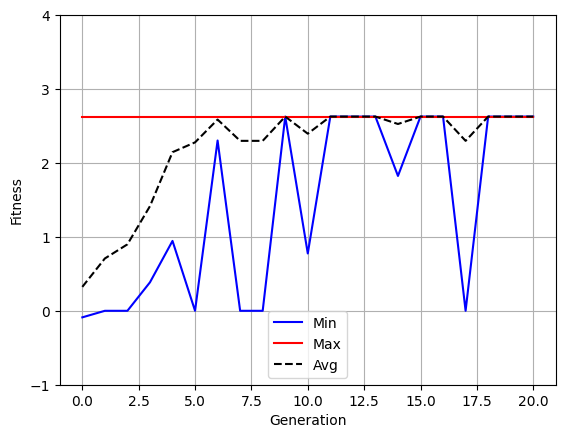

In [ ]:
# Generación de población
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 8)
random.seed(42)
best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

En la gráfica, el color rojo indica el valor más alto de cada generación, el azul el valor más bajo y el negro discontinuo el valor promedio. Se aprecia que cuando el valor mínimo varía mucho, el algoritmo pasa a una etapa de exploración, donde explora otras áreas para encontrar la mejor solución.

Se puede apreciar que todas las gráficas se estabilizan por primera vez alrededor de la generación 8 o 9; lo cual es un buen indicador de que el algortitmo ha convergido.

Asimismo, el valor máximo y el valor promedio se mantienen bastante estables alrededor de ese mismo valor de convergencia, mientras que, como ha sido comentado anteriormente, el valor mínimo indica la búsqueda de una mejor solución; aunque sin éxito, ya que no se alcanza un valor más óptimo. Cabe destacar, que el valor más alto de cada generación se alcanza desde la primera.

# EJERCICIO 2

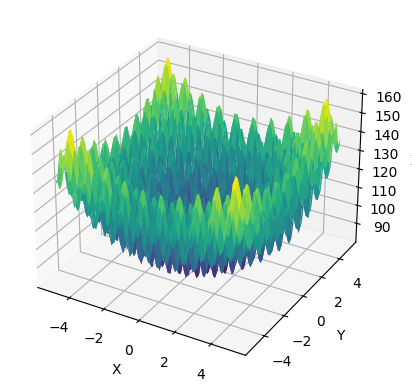

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Función para graficar
def fun_rastrigin(x, y, A):
    result = A * 10 + (x**2 - A * np.cos(2 * np.pi * x)) + (y**2 - A * np.cos(2 * np.pi * y))
    return result

# Genera datos para x y y
axis_x = np.linspace(-5.12, 5.12, 100)
axis_y = np.linspace(-5.12, 5.12, 100)
axis_x, axis_y = np.meshgrid(axis_x, axis_y)

A = 10
# Evalúa la función de Rastrigin en cada punto (axis_x, axis_y)
axis_z = fun_rastrigin(axis_x, axis_y, A)

# Crea la figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grafica la superficie
ax.plot_surface(axis_x, axis_y, axis_z, cmap='viridis')

# Etiqueta los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Muestra la gráfica
plt.show()

gen	nevals	avg    	std    	min    	max   
0  	640   	185.539	32.4144	64.5852	294.46
1  	526   	173.079	50.346 	63.1994	556.795
2  	487   	151.853	49.2665	56.0508	476.327
3  	511   	136.708	53.3048	50.7137	624.565
4  	497   	124.566	50.3346	50.7137	419.683
5  	493   	114.697	52.4367	47.0587	483.286
6  	513   	102.473	51.8432	29.8961	642.611
7  	503   	92.743 	51.7591	31.0457	480.342
8  	522   	82.6637	48.1685	27.2499	493.203
9  	521   	76.459 	51.652 	21.3453	458.65 
10 	483   	67.2105	45.5738	16.8891	390.124
11 	493   	57.9172	45.7881	18.3373	364.804
12 	498   	55.786 	52.2942	15.7966	480.891
13 	519   	49.6094	49.2262	11.6232	351.991
14 	513   	49.3503	52.074 	10.6001	372.298
15 	516   	46.7634	53.4044	8.41688	398.741
16 	504   	36.7876	45.3769	8.41688	375.956
17 	478   	35.9256	48.4662	8.41688	388.122
18 	508   	34.82  	48.9721	7.19271	329.243
19 	515   	31.6509	45.3482	6.64381	448.48 
20 	483   	31.8164	52.9411	6.64381	507.351
21 	492   	30.8349	46.4281	5.39496	373.433
22 	529   	30

98 	513   	24.2308	47.4146	0.726348	285.279
99 	505   	23.0617	47.915 	0.726348	270.189
100	516   	24.5168	49.1751	0.726348	280.165
Mejor fitness: 0.724582
Mejor individuo [-0.010369178203798318, 0.0012755667683571796, 0.02685748604833965, 0.03039370840681939, 0.020446631829469455, -0.025686994044456624, 0.016100368552835143, 0.007891055140154785, 0.02196762823627936, -0.004856833482704381]


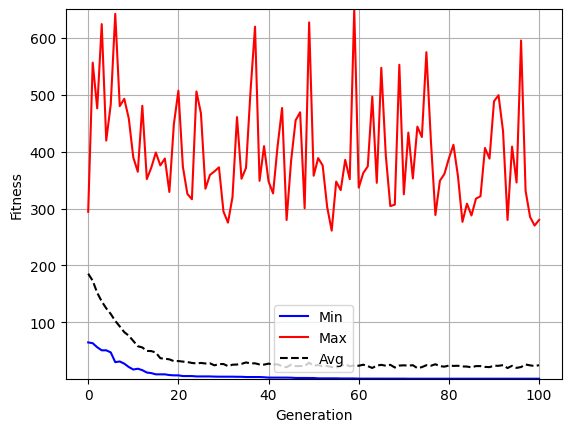

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from deap import base, creator, tools, algorithms

# Función de fitness (Rastrigin)
def funcion_rastrigin(x):
    A = 10
    n = len(x)
    term1 = A * n
    term2 = np.sum([x[i]**2 - A * np.cos(2 * np.pi * x[i]) for i in range(n)])
    aux = term1 + term2
    return aux,

# CREACION DEL MODELO

# Creación de clases FitnessMin e Individual para minimización del problema
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Configuración del Toolbox
toolbox = base.Toolbox()

# Registro de atributo float para representar variables del individuo
toolbox.register("attr_float", np.random.uniform, -5.12, 5.12)

# Registro de individuo como una lista de atributos float
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=10)

# Registro de población como una lista de individuos
toolbox.register("population", tools.initRepeat, list, toolbox.individual, 640)

# Registro de la función de evaluación (fitness) en el toolbox
toolbox.register("evaluate", funcion_rastrigin)

# Registro de operadores genéticos en el toolbox
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=5, indpb=0.2)

# Registro del operador de selección (torneo) en el toolbox
toolbox.register("select", tools.selTournament, tournsize=3)

# Función principal del algoritmo evolutivo
def main():
    CXPB, MUTPB, NGEN = 0.7, 0.3, 100
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)

    return hof, logbook

# Ejecución del algoritmo evolutivo
mejor1, log1 = main()

# Imprimir el mejor fitness y el mejor individuo obtenido
print("Mejor fitness: %f" % mejor1[0].fitness.values)
print("Mejor individuo %s" % mejor1[0])

# Llamada a la función para graficar la evolución del algoritmo
plot_evolucion(log1)


Analizando esta gráfica, observamos que al rededor de la generación 30 la función converge y se consigue encontrar el mejor individuo.

El movimiento fluctuante de la línea roja es debido a que nuestra función tiene muchos mínimos locales, y como no queremos caer en ellos exploramos otras opciones.

La función funcion_rastrigin es nuestra medida de aptitud, que evalúa qué tan buena es una solución en nuestro espacio de búsqueda. Esta función utiliza la fórmula de Rastrigin, que depende de los valores del individuo x y un parámetro A.

El corazón de nuestro programa es la función genetic_algorithm. Esta función inicia generando una población inicial de individuos aleatorios, cada uno con dimensiones en el rango [-5.12, 5.12]. Luego, durante un número fijo de generaciones (100 en este caso), el algoritmo evoluciona la población. En cada generación, calcula la aptitud de cada individuo usando funcion_rastrigin, selecciona a los padres para la próxima generación a través de un torneo, y luego usa operadores de cruce para crear la próxima generación. Este ciclo se repite hasta que se han completado todas las generaciones, y al final, la función devuelve la mejor solución encontrada.



